# Build a geospatial model to predict the best areas for property investment.
- By: SilviaGu

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [337]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV

In [292]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [396]:
import altair as alt
from vega_datasets import data

In [181]:
df = pd.read_csv('data_x.csv')

## Q1: What are the 10 zip codes we should focus on? 

## 1. Dataset preparation

- Target Variable: Median Estimated Home Value(owner occupied units)
- Target Identifier(Row unit) : zip code (group by zip code and year and take average of other numerical values)

In [116]:
df.head()

,id,Tract_number,zip_code,Year,state,Unweighted Sample Count of the population,Avg household size of occupied housing units,Total population in occupied housing units,Median Estimated Home Value(owner occupied units),Total Population,...,Renter households,Housing units with mortgage,Total housing Units,Number of Sales and office workers,Number of people in management business science and arts,Number of service workers,Number of educational and health service workers,Number of artsentertainment and food service workers,Number of finance and real estate workers,Number of tech workers
0,1,1001020100,36067.0,2012,Alabama,195.0,2,1764,121500.0,1812,...,203,357,724,289,242,98,105,55,27,0
1,2,1001020200,36067.0,2012,Alabama,222.0,2,2074,130500.0,2218,...,722,311,893,180,367,144,220,79,49,0
2,3,1001020300,36067.0,2012,Alabama,261.0,2,3103,118700.0,3155,...,643,551,1361,334,450,310,217,183,51,29
3,4,1001020400,36067.0,2012,Alabama,764.0,2,4329,133500.0,4337,...,915,848,1851,547,596,250,325,192,159,38
4,5,1001020500,36066.0,2012,Alabama,540.0,2,10431,174500.0,10498,...,3499,1815,4114,1409,2304,859,1036,499,323,57


In [118]:
# explore variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511392 entries, 0 to 511391
Data columns (total 26 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   id                                                        511392 non-null  int64  
 1   Tract_number                                              511392 non-null  int64  
 2   zip_code                                                  508357 non-null  float64
 3   Year                                                      511392 non-null  int64  
 4   state                                                     511392 non-null  object 
 5   Unweighted Sample Count of the population                 510464 non-null  float64
 6   Avg household size of occupied housing units              511392 non-null  int64  
 7   Total population in occupied housing units                511392 non-null  int64  
 8   Medi

In [119]:
# Look at statistics of numerical values
df.describe()

,id,Tract_number,zip_code,Year,Unweighted Sample Count of the population,Avg household size of occupied housing units,Total population in occupied housing units,Median Estimated Home Value(owner occupied units),Total Population,Median Gross rent as % of household inc,...,Renter households,Housing units with mortgage,Total housing Units,Number of Sales and office workers,Number of people in management business science and arts,Number of service workers,Number of educational and health service workers,Number of artsentertainment and food service workers,Number of finance and real estate workers,Number of tech workers
count,511392.000000,5.113920e+05,508357.000000,511392.000000,510464.000000,511392.000000,511392.000000,5.110470e+05,511392.000000,511392.000000,...,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000
mean,245259.928571,2.782602e+10,50689.436068,2014.857143,355.655135,2.129124,4214.901758,2.252238e+05,4325.183785,30.206405,...,1413.807561,669.422537,1827.629609,473.524826,721.872456,352.438462,448.481026,186.095887,130.312785,41.973993
std,133687.409974,1.581001e+10,29262.662964,1.807018,187.964759,0.591227,2122.779132,1.970134e+05,2130.207678,9.164117,...,1135.065639,473.430636,866.268775,286.956461,570.382097,221.873957,280.688857,149.297336,124.953420,51.307240
min,1.000000,1.001020e+09,1001.000000,2012.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,127848.750000,1.212708e+10,27530.000000,2013.000000,254.000000,2.000000,2798.000000,1.030000e+05,2891.000000,25.000000,...,607.000000,339.000000,1256.000000,274.000000,327.000000,200.000000,257.000000,89.000000,49.000000,10.000000
50%,255696.500000,2.712304e+10,48104.000000,2015.000000,321.000000,2.000000,3959.000000,1.644000e+05,4062.000000,29.000000,...,1124.000000,591.000000,1722.000000,426.000000,580.000000,311.000000,399.000000,152.000000,97.000000,27.000000
75%,374412.250000,4.103597e+10,77428.000000,2017.000000,406.000000,2.000000,5318.000000,2.810000e+05,5436.000000,35.000000,...,1915.000000,905.000000,2283.000000,617.000000,973.000000,456.000000,582.000000,242.000000,175.000000,57.000000
max,438336.000000,5.604595e+10,99928.000000,2017.000000,6289.000000,14.000000,65345.000000,2.000001e+06,65528.000000,50.000000,...,22309.000000,12672.000000,26526.000000,6131.000000,18936.000000,4007.000000,9073.000000,5123.000000,2947.000000,1142.000000


## a. Data Cleaning


In [7]:
df = df.drop_duplicates()

In [117]:
print('Total number of distinct zip code is:',len(df.zip_code.value_counts()))

Total number of distinct zip code is: 21953


In [182]:
# Generate zip code yearly unit
df = df.groupby(['Year','state','zip_code']).mean()

In [183]:
# Drop unrelated identification variables
df = df.drop(columns = ['id','Tract_number'])

In [184]:
df.head()

Unweighted Sample Count of the population  \
Year state   zip_code                                              
2012 Alabama 35004.0                                       259.0   
             35005.0                                       384.0   
             35006.0                                       602.0   
             35007.0                                       327.6   
             35010.0                                       294.0   

                       Avg household size of occupied housing units  \
Year state   zip_code                                                 
2012 Alabama 35004.0                                            2.0   
             35005.0                                            2.0   
             35006.0                                            2.0   
             35007.0                                            2.2   
             35010.0                                            2.0   

                       Total population in occupied housing units  \
Year state   zip_code                                               
2012 Alabama 35004.0                                       5773.0   
             35005.0                                       3311.0   
             35006.0                                       4552.0   
             35007.0                                       4382.4   
             35010.0                                       4597.5   

                       Median Estimated Home Value(owner occupied units)  \
Year state   zip_code                                                      
2012 Alabama 35004.0                                            136850.0   
             35005.0                                            103525.0   
             35006.0                                            105300.0   
             35007.0                                            148860.0   
             35010.0                                             86300.0   

                       Total Population  \
Year state   zip_code                     
2012 Alabama 35004.0             5773.0   
             35005.0             3322.0   
             35006.0             4580.0   
             35007.0             4439.0   
             35010.0             4633.5   

                       Median Gross rent as % of household inc  Median Age  \
Year state   zip_code                                                        
2012 Alabama 35004.0                                     26.00        39.0   
             35005.0                                     30.25        38.5   
             35006.0                                     21.00        35.0   
             35007.0                                     27.60        35.0   
             35010.0                                     31.50        40.0   

                       Median Household Income  Total Population over 25  \
Year state   zip_code                                                      
2012 Alabama 35004.0                  54212.50                    4075.5   
             35005.0                  44204.75                    2303.5   
             35006.0                  46929.00                    2972.0   
             35007.0                  59236.60                    2990.6   
             35010.0                  37321.50                    3231.0   

                       Median Gross Rent  ...  Renter households  \
Year state   zip_code                     ...                      
2012 Alabama 35004.0              914.00  ...             1360.5   
             35005.0              745.75  ...              607.5   
             35006.0              591.00  ...              982.0   
             35007.0             1062.60  ...              684.6   
             35010.0              547.00  ...             1466.0   

                       Housing units with mortgage  Total housing Units  \
Year state   zip_code                                                     
2012 Alabama 35004.0  

In [185]:
# Checking null values
df.isnull().sum()

Unweighted Sample Count of the population                   80
Avg household size of occupied housing units                 0
Total population in occupied housing units                   0
Median Estimated Home Value(owner occupied units)           38
Total Population                                             0
Median Gross rent as % of household inc                      0
Median Age                                                   0
Median Household Income                                     13
Total Population over 25                                     0
Median Gross Rent                                           59
Homeowner households                                         0
Renter households                                            0
Housing units with mortgage                                  0
Total housing Units                                          0
Number of Sales and office workers                           0
Number of people in management business science and art

### Rationale for data cleaning:

- Drop the rows in lack of "Median Estimated Home Value(owner occupied units)" as it's our target variable.
- Drop the column "Unweighted Sample Count of the population" as it's hightly correlated with Population.
- Drop the rows in lack of "Median Household Income" and "Median Gross Rent" as the number of null value is much lower than total sample size. In addition, these 2 varaibles tend to impact home value(target variable), it's not fair to imputate null with average value.

In [186]:
house_df = df.drop(columns = ['Unweighted Sample Count of the population'])

In [187]:
house_df = house_df.dropna(axis = 0)

In [188]:
house_df.isnull().sum()

Avg household size of occupied housing units                0
Total population in occupied housing units                  0
Median Estimated Home Value(owner occupied units)           0
Total Population                                            0
Median Gross rent as % of household inc                     0
Median Age                                                  0
Median Household Income                                     0
Total Population over 25                                    0
Median Gross Rent                                           0
Homeowner households                                        0
Renter households                                           0
Housing units with mortgage                                 0
Total housing Units                                         0
Number of Sales and office workers                          0
Number of people in management business science and arts    0
Number of service workers                                   0
Number o

## b. Conduct feature selection by investigating correlations among independent variables

In [189]:
house_df.corr()

,Avg household size of occupied housing units,Total population in occupied housing units,Median Estimated Home Value(owner occupied units),Total Population,Median Gross rent as % of household inc,Median Age,Median Household Income,Total Population over 25,Median Gross Rent,Homeowner households,Renter households,Housing units with mortgage,Total housing Units,Number of Sales and office workers,Number of people in management business science and arts,Number of service workers,Number of educational and health service workers,Number of artsentertainment and food service workers,Number of finance and real estate workers,Number of tech workers
Avg household size of occupied housing units,1.000000,0.284195,0.027038,0.262849,0.128050,-0.271877,0.135274,0.153516,0.179881,0.242137,0.150233,0.133260,-0.055839,0.172192,0.014865,0.229805,0.080446,0.085129,0.022602,-0.002466
Total population in occupied housing units,0.284195,1.000000,0.143853,0.970561,0.064250,-0.134506,0.266879,0.949965,0.268991,0.875028,0.506010,0.838425,0.781908,0.860884,0.687431,0.723855,0.744463,0.544568,0.572463,0.432469
Median Estimated Home Value(owner occupied units),0.027038,0.143853,1.000000,0.133449,0.034877,0.119093,0.737775,0.180093,0.739946,0.102107,0.119545,0.206965,0.126878,0.199209,0.506698,0.019336,0.203117,0.184386,0.445454,0.471357
Total Population,0.262849,0.970561,0.133449,1.000000,0.071131,-0.191261,0.242345,0.949530,0.259692,0.835963,0.514777,0.801640,0.757172,0.854376,0.680948,0.740616,0.763005,0.558211,0.553777,0.424232
Median Gross rent as % of household inc,0.128050,0.064250,0.034877,0.071131,1.000000,-0.081884,-0.168181,0.028952,0.194059,-0.060054,0.241302,-0.040491,0.059313,0.035331,-0.069605,0.167589,0.029796,0.134953,-0.041257,0.005103
Median Age,-0.271877,-0.134506,0.119093,-0.191261,-0.081884,1.000000,0.162479,0.018689,-0.022039,0.115367,-0.475851,0.104285,0.158306,-0.160687,-0.066324,-0.276782,-0.159285,-0.210803,-0.046516,-0.093550
Median Household Income,0.135274,0.266879,0.737775,0.242345,-0.168181,0.162479,1.000000,0.286153,0.716476,0.384191,-0.131807,0.482300,0.118560,0.350410,0.661662,-0.006155,0.338572,0.100284,0.562995,0.461029
Total Population over 25,0.153516,0.949965,0.180093,0.949530,0.028952,0.018689,0.286153,1.000000,0.272591,0.861005,0.430177,0.837343,0.823160,0.823182,0.692139,0.670356,0.715605,0.516417,0.578665,0.445502
Median Gross Rent,0.179881,0.268991,0.739946,0.259692,0.194059,-0.022039,0.716476,0.272591,1.000000,0.187736,0.223321,0.309370,0.146056,0.347591,0.551765,0.151711,0.274496,0.258468,0.492237,0.481356
Homeowner households,0.242137,0.875028,0.102107,0.835963,-0.060054,0.115367,0.384191,0.861005,0.187736,1.000000,0.025547,0.932857,0.677300,0.753812,0.622745,0.499126,0.663337,0.323084,0.503168,0.322195


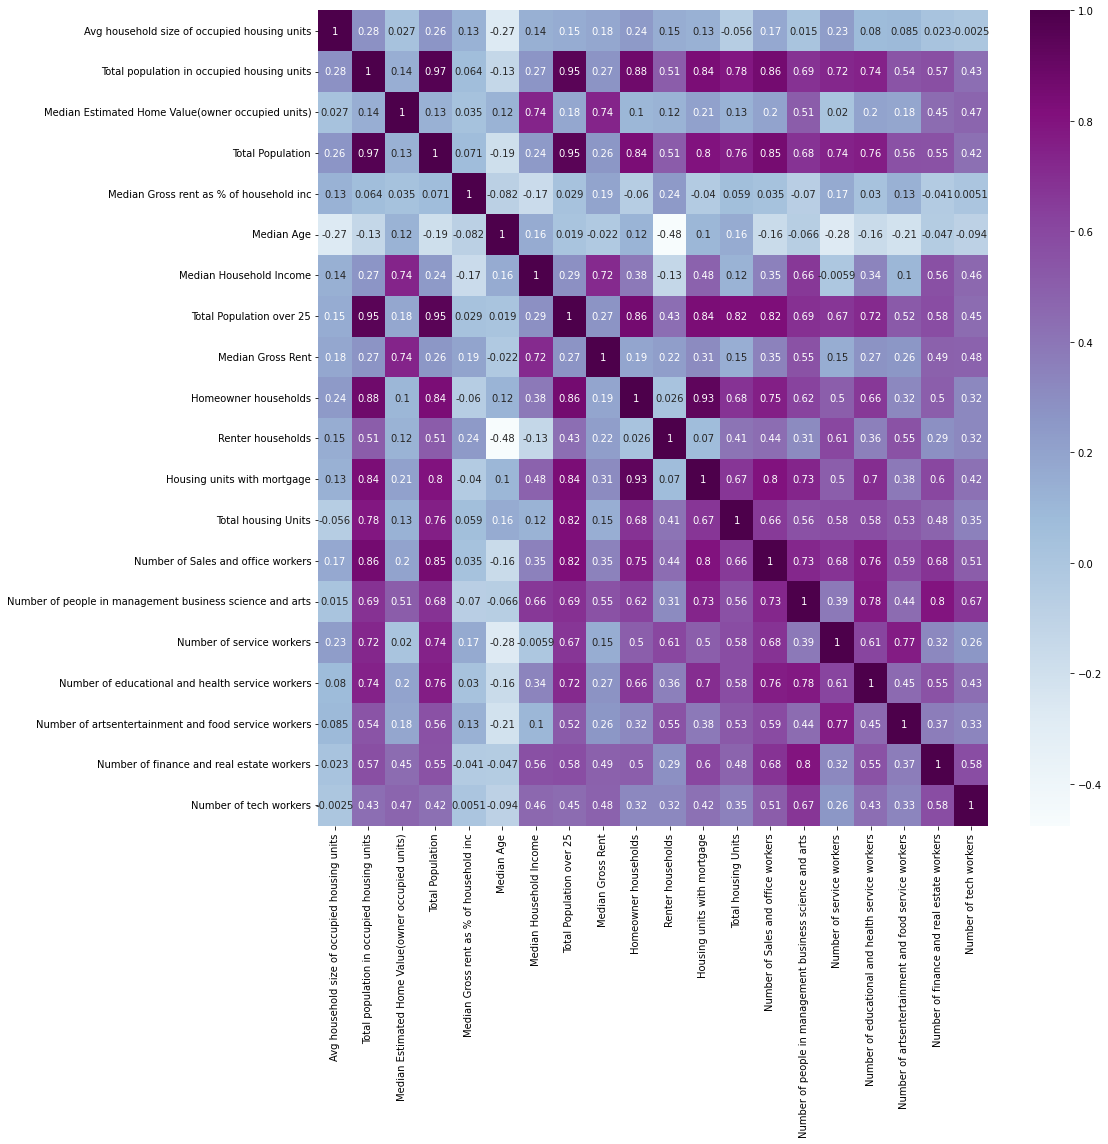

In [150]:
# visualize feature correlation through heatmap
plt.figure(figsize = (15,15))
sns.heatmap(house_df.corr(), annot=True, cmap="BuPu")
plt.show()

### Rationale for feature selection
- drop features that have more than 90% correlation coefficients with other features(independent variables). 
- Keep the one has higher correlation with target variables when deciding which one to drop between a corrrelated feature pair.

In [190]:
house_df = house_df.drop(columns = ['Total Population','Total population in occupied housing units','Homeowner households'])

In [191]:
len(house_df)

131607

### c. One hot Encoding for the categorical feature

In [196]:
house_df = house_df.reset_index()

In [194]:
ohe = OneHotEncoder()

In [ ]:
transformed = ohe.fit_transform(house_df[['state']])

In [205]:
house_df[ohe.categories_[0]] = transformed.toarray()

In [208]:
house_df = house_df.drop(columns = ['state'])

### d. Train Test Split and feature normalization
- Make the last year of data as test dataset to evaluate the house value prediction model built from previous years

In [210]:
test = house_df[house_df.Year == 2017]

In [211]:
test_X = test.drop(columns = ['Median Estimated Home Value(owner occupied units)']).set_index('zip_code')

In [212]:
test_y = test['Median Estimated Home Value(owner occupied units)']

In [213]:
train = house_df.drop(house_df.loc[house_df['Year'] == 2017].index)

In [214]:
train_X = train.drop(columns = ['Median Estimated Home Value(owner occupied units)']).set_index('zip_code')

In [215]:
train_y = train['Median Estimated Home Value(owner occupied units)']

In [216]:
# data normalization

# copy of datasets
X_train_norm = train_X.copy()
X_test_norm = test_X.copy()

# numerical features
num_cols = train_X.columns

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = MinMaxScaler().fit(X_train_norm[[i]])
    
    # transform the training data column
    X_train_norm[i] = scale.transform(X_train_norm[[i]])
    
    # transform the testing data column
    X_test_norm[i] = scale.transform(X_test_norm[[i]])

# 2. Train and evaluate Regression Models

## a. Decision Tree
- We have a large dataset with both large number of dimensions and samples. 
- Decision tree works well with both categorical and continuous values.
- The interpretability of trees is good.Feature importance can be calculated.
 

In [172]:
dtr = DecisionTreeRegressor(random_state= 0)

In [219]:
dtr.fit(X_train_norm, train_y)

DecisionTreeRegressor(random_state=0)

In [222]:
print("R-sqaure of the training data is:", dtr.score(X_train_norm, train_y))

R-sqaure of the training data is: 1.0


In [223]:
print("R-sqaure of the testing data is:", dtr.score(X_test_norm, test_y))

R-sqaure of the testing data is: 0.8138245730912286


### Calculate and plot feature importance

In [297]:
def plot_top_feature_importances(model, num_top):
    plt.figure(figsize=(10,8))
    feature_importances_dict = dict(zip(list(model.feature_names_in_), list(model.feature_importances_)))
    sorted_importance_list = sorted(feature_importances_dict.items(), key = lambda x: x[1], reverse = True)
    n_features = num_top
    plt.barh(range(num_top), [sorted_importance_list[i][1] for i in range(n_features)], align='center')
    plt.yticks(np.arange(n_features), [sorted_importance_list[i][0] for i in range(n_features)])
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    print('Top n importance features are:', [sorted_importance_list[i][0] for i in range(n_features)])

Top n importance features are: ['Median Gross Rent', 'Median Household Income', 'California', 'Housing units with mortgage', 'Median Age', 'Avg household size of occupied housing units', 'Number of people in management business science and arts', 'Total housing Units', 'New York', 'Renter households', 'Number of finance and real estate workers', 'Number of educational and health service workers', 'Number of artsentertainment and food service workers', 'Number of tech workers', 'Total Population over 25', 'Number of Sales and office workers', 'Number of service workers', 'Median Gross rent as % of household inc', 'Hawaii', 'Texas']


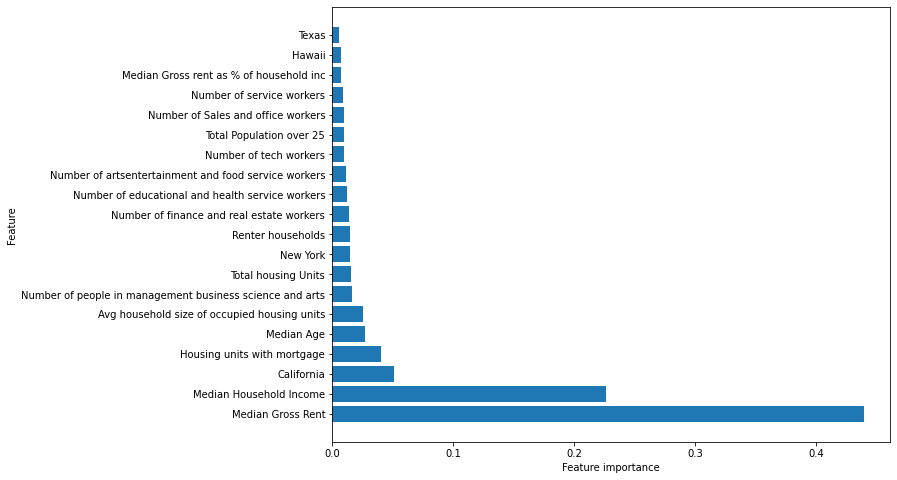

In [298]:
plot_top_feature_importances(dtr, 20)

In [316]:
top_n_important_features =  ['Median Gross Rent', 'Median Household Income', 'California', 'Housing units with mortgage', 'Median Age', 'Avg household size of occupied housing units', 'Number of people in management business science and arts', 'Total housing Units', 'New York', 'Renter households', 'Number of finance and real estate workers', 'Number of educational and health service workers', 'Number of artsentertainment and food service workers', 'Number of tech workers', 'Total Population over 25', 'Number of Sales and office workers', 'Number of service workers', 'Median Gross rent as % of household inc', 'Hawaii', 'Texas']

## b. Lasso Regression
- Considering we have a lot of features, lasso regression is able to conduct feature selection during the training through the L1 norm regularization.

In [70]:
lasso = linear_model.Lasso()

In [281]:
lasso = linear_model.Lasso()

In [286]:
lasso.fit(X_train_norm, train_y)

Lasso()

In [290]:
print("R-sqaure of the training data is:",lasso.score(X_train_norm, train_y))

R-sqaure of the training data is: 0.7831617754090967


In [291]:
print("R-sqaure of the testing data is:",lasso.score(X_test_norm, test_y))

R-sqaure of the testing data is: 0.7728098359838693


## c. Random Forest
- Try to improve the performance of base line decison tree by using ensemble methods.
- To avoid overfitting, which we can already tell from the decision tree train, test R square comparison, I used Bagging- Random Forest, instead of Boosting(GBT, XGboost, etc).
- Only focus on the top 20 important features to simplify the model as ensembel methods take longer time to train

In [321]:
rfr = RandomForestRegressor(n_estimators = 20, max_depth = 15, random_state= 0)

In [318]:
X_train_selected = X_train_norm[top_n_important_features]

In [319]:
X_test_selected = X_test_norm[top_n_important_features]

In [322]:
rfr.fit(X_train_selected, train_y)

RandomForestRegressor(max_depth=15, n_estimators=20, random_state=0)

In [323]:
rfr.score(X_train_selected, train_y)

0.9484112672286874

In [341]:
rfr.score(X_test_selected, test_y)

0.8822919781811478

Top n importance features are: ['Median Gross Rent', 'Median Household Income', 'California', 'Housing units with mortgage', 'Median Age', 'Avg household size of occupied housing units', 'Number of people in management business science and arts', 'Total housing Units', 'Renter households', 'New York', 'Number of finance and real estate workers', 'Number of tech workers', 'Number of Sales and office workers', 'Number of artsentertainment and food service workers', 'Number of educational and health service workers', 'Number of service workers', 'Total Population over 25', 'Median Gross rent as % of household inc', 'Hawaii', 'Texas']


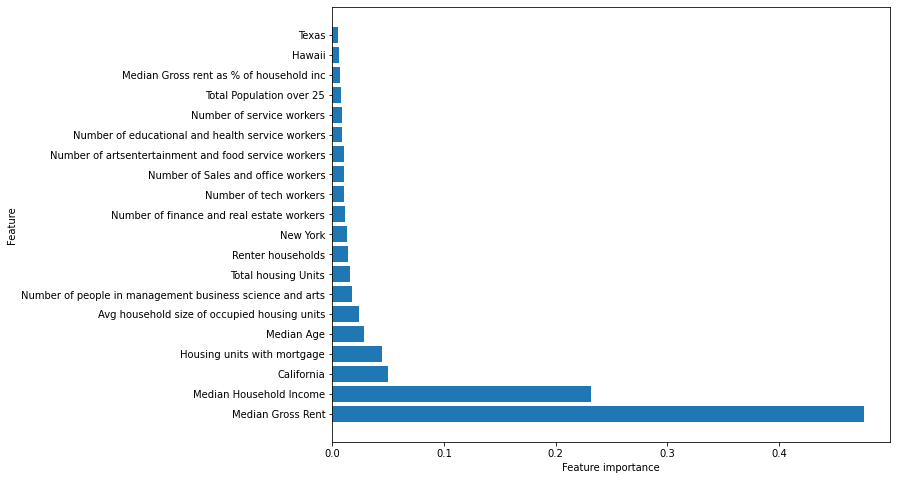

In [401]:
plot_top_feature_importances(rfr, 20)

### Hyperparameter Tuning if given more time

In [338]:
# Number of trees in random forest
n_estimators = [5, 10,20]
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 50, 10)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

In [ ]:
gs_rf = GridSearchCV(rfr,
                      param_grid=random_grid,
                      cv=5)
gs_rf.fit(X_train_selected,train_y)
print(gs_rf.best_params_)
# find best model score
print(gs_rf.score(X_train_selected,train_y))

In [335]:
def hp_tuning(parameter, configs, X_train, y_train):
    CV_scores = []
    for config in configs: 
        dict = {parameter: config}      
        model = RandomForestRegressor(**dict, random_state= 0)
        model.fit(X_train,y_train)
        CV_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
        CV_scores.append(CV_score)
    best_id = np.where(CV_scores == np.max(CV_scores))[0][0]
    
    line1= plt.plot(configs, CV_scores, c = 'blue', label="cross validation R square")
    plt.axvline(x=configs[best_id],linestyle='--',color="red")
    plt.ylabel('R square')
    plt.xlabel(parameter)
    plt.show()
    
    print('The best parameter is:', configs[best_id])

In [ ]:
hp_tuning('n_estimators', range(5, 30, 5), X_train_selected, train_y)

# 3. Predict top 10 valuable zip code for investment

In [ ]:
pred_value = rfr.predict(X_test_selected)

In [ ]:
test['pred'] = preds

In [352]:
top_10_investment = test.sort_values(by = ['pred'], ascending= False).head(10)

## The top 10 zip code that investors should focus on in 2017 and corresponding predicted housing values are as below 

In [360]:
top_10_investment[['zip_code','pred']].astype(np.int64)

,zip_code,pred
112045,94957,1866161
111848,94028,1854326
111844,94022,1849287
111845,94024,1737150
112027,94920,1719000
111843,94020,1699745
111001,90402,1683538
110989,90290,1666546
111847,94027,1635062
122515,10281,1629689


In [408]:
top_10_zipcode = list(top_10_investment.zip_code)

In [414]:
top_10_overyear = house_df.loc[house_df.zip_code.isin(top_10_zipcode)][['zip_code','Year','Median Estimated Home Value(owner occupied units)']]

In [419]:
pivot = top_10_overyear.pivot(index = 'zip_code', columns = 'Year', values = 'Median Estimated Home Value(owner occupied units)')


In [430]:
pivot['growth_rate'] = (pivot[2017] - pivot[2012])/pivot[2017]

### Further calculate the value growth rate to evaluate the investment return rate

In [432]:
pivot

Year,2012,2013,2014,2015,2016,2017,growth_rate
zip_code,,,,,,,
10281.0,1000001.0,1000001.0,1000001.0,2000001.0,1654400.0,2000001.0,0.500000
90290.0,1000001.0,1000001.0,1000001.0,1847000.0,1837800.0,1899600.0,0.473573
90402.0,974700.8,968400.8,970980.8,1782680.8,1793640.8,1805120.8,0.460036
94020.0,1000001.0,1000001.0,1000001.0,1646700.0,1970200.0,1935200.0,0.483257
94022.0,1000001.0,1000001.0,1000001.0,1928500.4,2000001.0,2000001.0,0.500000
94024.0,1000001.0,1000001.0,1000001.0,1609880.0,1756260.2,1890120.6,0.470933
94027.0,1000001.0,1000001.0,1000001.0,1699050.5,1849400.5,1927300.5,0.481139
94028.0,1000001.0,1000001.0,1000001.0,2000001.0,2000001.0,2000001.0,0.500000
94920.0,1000001.0,1000001.0,1000001.0,1772650.5,1869550.5,2000001.0,0.500000


## Q2:	How do geographically close zip codes impact each other

### Solution: Visualize the housing value of top 5000 valuable zip code to observe patterns between neighbors

In [375]:
zip_map = pd.read_csv('zip_lat_long.csv')

In [397]:
# map the zipcode with latitude and longitute data for visualization
zip_map.head()

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [371]:
all_pred_value = test.sort_values(by = ['pred'], ascending= False)[['zip_code','pred','Median Estimated Home Value(owner occupied units)']].astype(np.int64)

In [377]:
merge_df = pd.merge(
    left = all_pred_value,
    right= zip_map,
    how = 'left',
    left_on = 'zip_code',
    right_on = 'ZIP')

In [395]:
merge_df.head()

,zip_code,pred,Median Estimated Home Value(owner occupied units),ZIP,LAT,LNG
0,94957,1866161,2000001,94957.0,37.963111,-122.563588
1,94028,1854326,2000001,94028.0,37.376828,-122.209796
2,94022,1849287,2000001,94022.0,37.357489,-122.144437
3,94024,1737150,1890120,94024.0,37.352234,-122.094399
4,94920,1719000,2000001,94920.0,37.885629,-122.468580


### Visualize Median Estimated Home Value of top 500 valuable zip codes
- heatmap color represents house value
- Tooltips are zip codes

In [398]:
states = alt.topo_feature(data.us_10m.url, feature='states')
housing = merge_df.head(5000)

background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project('albersUsa').properties(
    width=500,
    height=300
)

points = alt.Chart(housing).mark_circle().encode(
    longitude='LNG:Q',
    latitude='LAT:Q',
    size=alt.value(10),
    tooltip='zip_code',
    color='Median Estimated Home Value(owner occupied units):Q'
)

background + points

alt.LayerChart(...)

### Bring close zip codes together by ranking to further observe relationship

In [404]:
merge_df.sort_values(by = ['zip_code','Median Estimated Home Value(owner occupied units)']).head(5)

,zip_code,pred,Median Estimated Home Value(owner occupied units),ZIP,LAT,LNG
6998,1001,220004,210925,1001.0,42.062368,-72.625754
5531,1002,254541,164266,1002.0,42.364061,-72.458739
3777,1003,312160,333600,1003.0,42.389941,-72.524108
3902,1005,307333,278200,1005.0,42.418848,-72.106598
4417,1007,287920,285633,1007.0,42.279010,-72.400468


### Conclusion:
- House values tend to show cluter patterns geographically. Most valuable zip codes for real estate investment are in California and New England areas. 
- Therefore, geographically close zip codes have positive impacts on each others. 